<a href="https://colab.research.google.com/github/suulee/Machine-learning/blob/master/assignment04/assignment04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==1.12.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
uploaded=files.upload()

Saving data_train1.csv to data_train1.csv


In [0]:
path = "data_train1.csv"

data = np.genfromtxt(path, delimiter=',')

len_train=len(data)
x_data = data[:,0:3]
y_data = []

for i in range(len_train):
  temp=[data[i,3]]
  y_data.append(temp)


#y_train = []
#y_train.extend(data[:,-1])
#num_data=len(x_data)

In [0]:
import csv
x_train=[]
y_train=[]

with open('data_train1.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 0
    for i in reader:
      x_train.append([])
#      y_train.append([])
      x_train[ct].extend(i[0:3])
      ct+=1
      y_train.append([i[3]])

#x_train=x_train.T()

#with open('data_test.csv', newline='') as myfile:
 #   reader  = csv.reader(myfile, delimiter=',')
  #  ct = 1 
   # for i in reader:
    #    print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
     #   ct += 1


In [77]:
theta1=tf.Variable(tf.random_normal([3,1],name='weight'))
theta0=tf.Variable(tf.random_normal([1],name='bias'))

X=tf.placeholder(tf.float32,shape=[None,3])
Y=tf.placeholder(tf.float32,shape=[None,1])


## hypothesis X*theta1+theta0
hypothesis= tf.matmul(X,theta1)+theta0

## Cost/loss function
cost= 0.5*tf.reduce_mean(tf.square(hypothesis-Y))

## Minimize
optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train=optimizer.minimize(cost)

## Launch the graph in a session
sess=tf.Session()

theta0_history=[]
theta1_history=[]
cost_history=[]

## Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

for step in range(9001):
    theta0_val,theta1_val,cost_val,_=sess.run([theta0,theta1,cost,train], feed_dict={X:x_data, Y:y_data})
    temp=[]
    temp.extend(theta1_val[0])
    temp.extend(theta1_val[1])
    temp.extend(theta1_val[2])

    theta0_history.extend(theta0_val)
    theta1_history.append(temp)
    cost_history.append(cost_val)
    if step%200==0:
      print(step,"cost:",cost_val)

0 cost: 182336.92
200 cost: 778.3994
400 cost: 604.7606
600 cost: 478.47134
800 cost: 386.40033
1000 cost: 319.0749
1200 cost: 269.66068
1400 cost: 233.22491
1600 cost: 206.20644
1800 cost: 186.034
2000 cost: 170.8494
2200 cost: 159.30873
2400 cost: 150.44002
2600 cost: 143.53903
2800 cost: 138.09488
3000 cost: 133.73628
3200 cost: 130.19305
3400 cost: 127.268036
3600 cost: 124.816696
3800 cost: 122.73259
4000 cost: 120.93733
4200 cost: 119.37227
4400 cost: 117.993645
4600 cost: 116.7684
4800 cost: 115.67108
5000 cost: 114.68228
5200 cost: 113.78663
5400 cost: 112.97183
5600 cost: 112.22822
5800 cost: 111.54767
6000 cost: 110.92348
6200 cost: 110.35005
6400 cost: 109.82247
6600 cost: 109.33671
6800 cost: 108.88892
7000 cost: 108.47586
7200 cost: 108.094765
7400 cost: 107.742966
7600 cost: 107.41812
7800 cost: 107.118004
8000 cost: 106.84077
8200 cost: 106.58464
8400 cost: 106.34797
8600 cost: 106.12922
8800 cost: 105.927
9000 cost: 105.74012


In [73]:
print(theta0_history[-1])

1.4115764


In [66]:
print(W1)

[1.3462535, 1.5100642, 1.5259129, 1.5264614, 1.5254287, 1.5242333, 1.5230222, 1.5218104, 1.5205996, 1.5193899, 1.5181813, 1.5169739, 1.5157675, 1.5145621, 1.513358, 1.5121549, 1.510953, 1.509752, 1.5085523, 1.5073537, 1.5061561, 1.5049597, 1.5037643, 1.50257, 1.5013769, 1.5001848, 1.4989939, 1.497804, 1.4966153, 1.4954276, 1.494241, 1.4930555, 1.4918711, 1.4906878, 1.4895056, 1.4883245, 1.4871445, 1.4859655, 1.4847876, 1.4836107, 1.4824351, 1.4812605, 1.4800869, 1.4789145, 1.4777431, 1.4765729, 1.4754037, 1.4742355, 1.4730685, 1.4719025, 1.4707376, 1.4695737, 1.468411, 1.4672493, 1.4660887, 1.4649291, 1.4637706, 1.4626132, 1.4614569, 1.4603016, 1.4591475, 1.4579942, 1.4568422, 1.4556911, 1.4545411, 1.4533921, 1.4522443, 1.4510975, 1.4499518, 1.4488071, 1.4476634, 1.4465209, 1.4453794, 1.4442389, 1.4430995, 1.4419612, 1.4408239, 1.4396876, 1.4385524, 1.4374182, 1.4362851, 1.4351531, 1.4340221, 1.4328921, 1.4317632, 1.4306352, 1.4295084, 1.4283826, 1.4272579, 1.4261342, 1.4250115, 1.4238

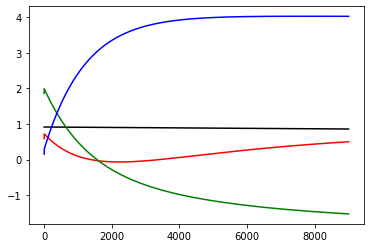

In [75]:
W1=[]
W2=[]
W3=[]
for i in theta1_history:
  W1.append(i[0])
  W2.append(i[1])
  W3.append(i[2])

plt.plot(theta0_history,color='black')
plt.plot(W1,color='red')
plt.plot(W2,color='green')
plt.plot(W3,color='blue')

plt.show()

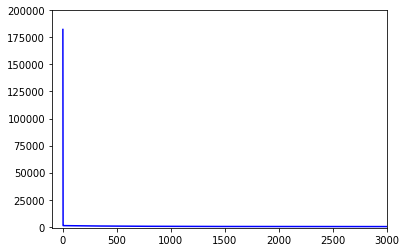

In [87]:
plt.plot(cost_history,color='blue')
plt.axis([-100,3000,-1000,200000])
plt.show()